# Step 1: installing instructions

For starters, you'll need to import the JUSTFAIR_Tools package to access our work.  To do this, you can do one of two things:
1. Download this package from the following link [here](https://github.com/nitkiew2/CMSE495-QSIDE-JUSTFAIR-TOOLBOX).  Please make sure to have your work in the same folder as the package if you're installing it this way.
2. install via pip.  If you're using pip, please see the cell below.

#### Installing via pip

Below is the code to install the package via pip.  All you have to do is uncomment the code by deleting the # signs and run the cell.  You only need to do this once, so we recommend re-commenting the code once this is done.

In [1]:
#from IPython.display import clear_output
#! pip install 'git+https://github.com/nitkiew2/CMSE495-QSIDE-JUSTFAIR-TOOLBOX.git'
#clear_output()

# Importing the work

Running the cell below will import the JUSTFAIR_Tools package, which we have abbreviated to jt for easier use.  To import JUSTFAIR_Tools, all you have to do is run the cell below.  Note, all the functions come pre-loaded, but if for some reason you don't want all the files to load, you can edit this in the packages init file.

In [1]:
import JUSTFAIR_Tools as jt

# Setting up a State

Now to set up a state object.  For this tutorial, we are working with the state of Minnesota's data.  All you need to set up a State object are 3 things:
1. a file or url to a file holding the state's judicial data
    * The JUSTFAIR's data repository can be found [here](https://drive.google.com/drive/folders/10ouH8HxIC-oc6c0BBrrAjkh_jCq6eNMH).  Please make sure to get the link to the actual csv file, not the folder it is in.
2. The State's paths object.  Paths are a way to convert confusing column names in a state's data to easy to understand terms.  For example, in Minnesota's data year is listed as sentyear, so we added a path from year --> sentyear. Now, when a user types in year, our programs know they're dealing with sentyear in Minnesota's data.  Additionally, all analysis is based off of these paths, so depending on what is in the paths is what you can do analysis on.  The nice thing about this is the only essential data is a way to classify sentencing departure and the year; everything else is extra layers to filter or group your data by.

Once we have a link to our data and the paths, we can create our state object!  The example below is creating a state object for Minnesota, so this template can be used to create other states as well.

In [5]:
paths = {}  # temporary paths dicitonary that will be passed into the creation of minnesota state object
paths['county'] = jt.Path('countyname')
paths['year'] = jt.Path('sentyear')
paths['district'] = jt.Path('district', {1:'1st', 2:'2nd', 3:'3rd', 4:'4th', 5:'5th',
                                         6:'6th',7:'7th', 8:'8th', 9:'9th', 0: '10th'}) # districs are groups of mult counties
paths['race'] = jt.Path('race', {'white':'White', 
                         'black':'Black', 
                         'amind':'American Indian',
                         'hispanic': 'Hispanic',
                         'asian': 'Asian',
                         'other': ' Other'})
paths['departure'] = jt.Path('durdep', {0:'Within Range', 
                                 1:'Above Departure', 
                                 2:'Below Range', 
                                 3:'Missing, Indeterminable, or Inapplicable'})
paths['judge'] = jt.Path('judge')
paths['sex'] = jt.Path('sex', {1: 'Male', 
                        2: 'Female'})
paths['age'] = jt.Path('Agecat', {1: 'Under 18', 
                           2: '18-21', 
                           3: '22-25', 
                           4: '26-30',
                           5: '31-40',
                           6: '41-50',
                           7: '51+'})


minnesota = jt.State('minnesota','../allmnclean.csv', paths, using_url = False)  # creates a state using a file on your computer
#minnesota = jt.State('minnesota','https://drive.google.com/file/d/1uz_-qgvObAPcB444fEhb_QizWSiKe-eg/view?usp=sharing',paths)  # creates a state using data pulled from JUSTFAIR's google drive

# Calling Analysis Functions

Now we can perform analysis!  To call analysis functions, simply type state_objects_name.function_name(parameters).  So far, we have the following functions working:
* state_trends
* generalizable_multi_level_summary
* individual_section_analysis_v2

## State Trends

This quick function just plots the departure trends for the state's data, letting a user see the current and trends of how a state sentences people.  It does not allow you to analyze subgroups.

Parameters:
* compressed: if true, put all lines on one graph, defaults to false and has one graph per departure type

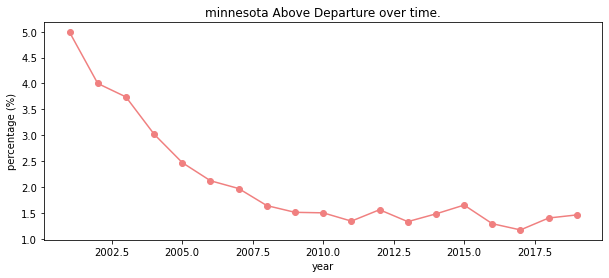

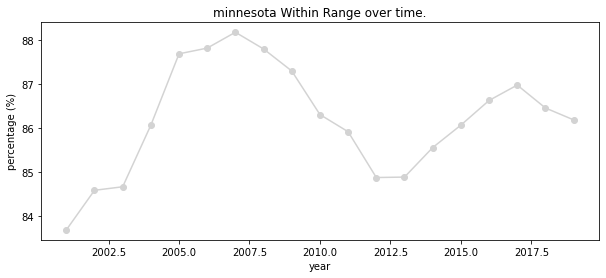

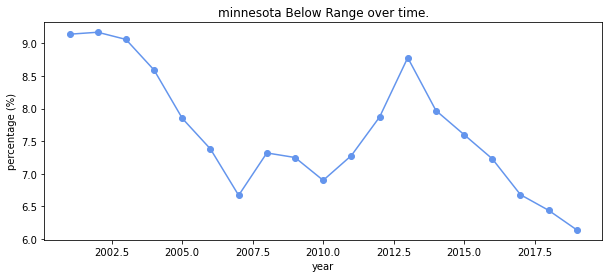

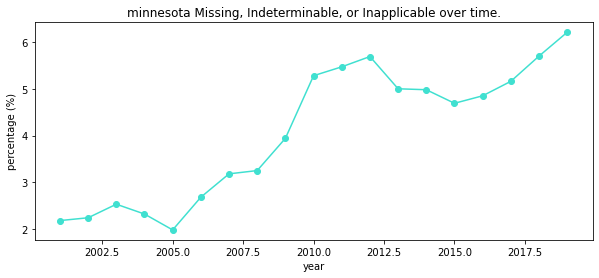

In [9]:
minnesota.state_trends()

## generalizable_multi_level_summary

The generalizable_multi_level_summary is a basic analysis tool.  This tool gives the sentencing breakdown for various groups within the state.  For example, the lowest level is looking at the breakdown of departure types at the  state level, and from there users can add items from their paths (ex: race) to add different groups to analyze.

Parameters:
* inp_list_of_groups: a list ending in your departure path.  The trick here is you can add any other path variables before the departure one, but departure has to be last because this function analyzes departure breakdowns of different groups.
* years: you can specify a list of years to analyze here if you wish.  Entering year in inp_list_of_groups will give a breakdown of each year.
* plot: specify plot type, can be 'pie', 'bar', or defaults to 'stacked bar' 


count  percent
race            durdep                                                   
American Indian Within Range                               18509     88.8
                Above Departure                              440      2.1
                Below Range                                 1424      6.8
                Missing, Indeterminable, or Inapplicable     482      2.3
Asian           Within Range                                6049     85.5
                Above Departure                              128      1.8
                Below Range                                  501      7.1
                Missing, Indeterminable, or Inapplicable     394      5.6
Black           Within Range                               61519     79.9
                Above Departure                             2051      2.7
                Below Range                                 9576     12.4
                Missing, Indeterminable, or Inapplicable    3828      5.0
Hispanic        Within Range                               13938     86.7
                Above Departure                              297      1.8
                Below Range                                 1183      7.4
                Missing, Indeterminable, or Inapplicable     659      4.1
 Other          Within Range                                 186     84.5
                Above Departure                                5      2.3
                Below Range                                   11      5.0
                Missing, Indeterminable, or Inapplicable      18      8.2
White           Within Range                              152762     88.8
                Above Departure                             2934      1.7
                Below Range                                 9513      5.5
                Missing, Indeterminable, or Inapplicable    6804      4.0

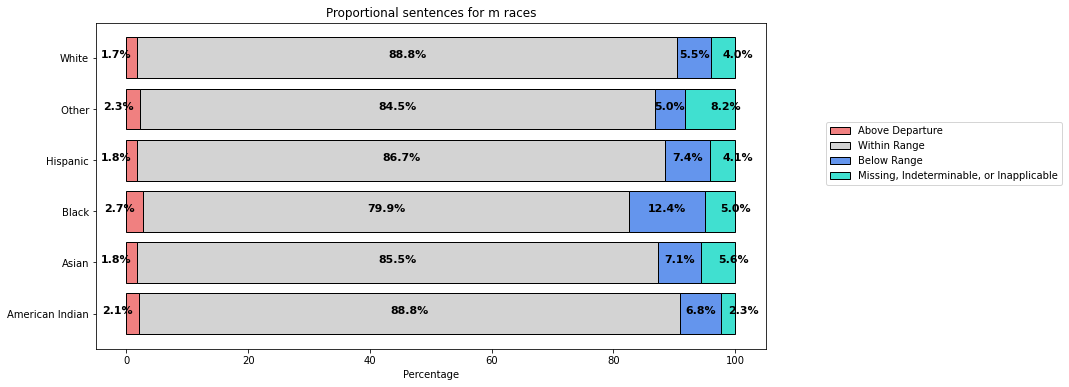

In [6]:
minnesota.generalizable_multi_level_summary(inp_list_of_groups = ['race', 'departure'], plot = 'stacked bar')

## individual_section_analysis

Individual section analysis takes the stats of a single area (judge, district, county, etc.) and compares the sentencing patterns in this section versus the rest of the state.

Parameters:
* category_name: what is the group the subsection is part of (ex: judge)
* section_name: what is the name of the section you are looking at (ex: a specific judge's name)
* inp_list_of_groups: what groups do you want to analyze for this section?  (ex: race, departure)
* years: what years do you want to analyze?
* plot: if true, generates graphs (defaulted to true).  If not true, just returns a dataframe.

output:

returns a dictionary with the following mapping: output\[year\] = \[judge_data, state_data\].  See the example 2 cells below for a reference.

Nord, Beryl was active in the years: [2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011]
Looking at Nord, Beryl vs minnesota for ('American Indian',) s
Nord, Beryl judge currently has an average Above Departure rate above state average in years queried
Nord, Beryl judge currently has an average Within Range rate below state average in years queried
Nord, Beryl judge currently has an average Below Range rate above state average in years queried
Nord, Beryl judge currently has an average Missing, Indeterminable, or Inapplicable rate above state average in years queried
Looking at Nord, Beryl vs minnesota for ('Asian',) s
Nord, Beryl judge currently has an average Above Departure rate about at state average in years queried
Nord, Beryl judge currently has an average Within Range rate below state average in years queried
Nord, Beryl judge currently has an average Below Range rate above state average in years queried
Nord, Beryl judge currently has an average Missing, Indeterminable, o

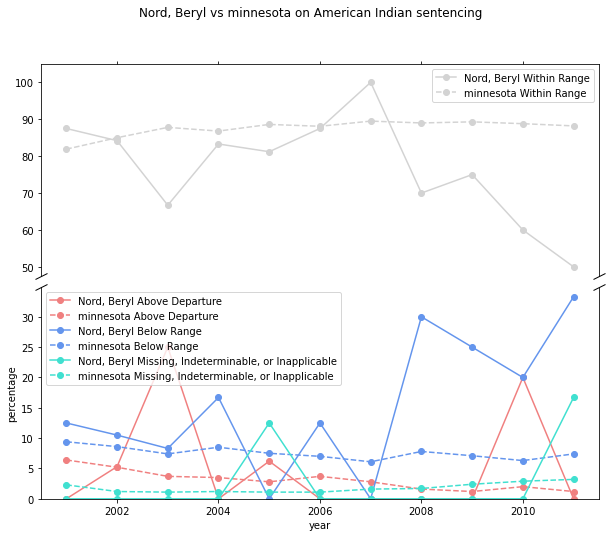

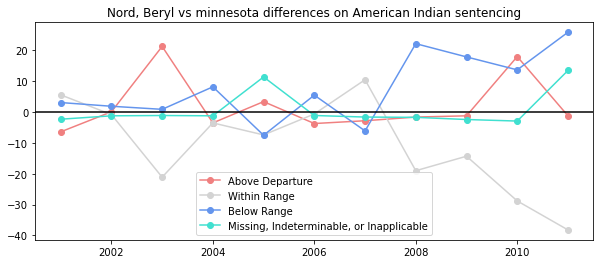

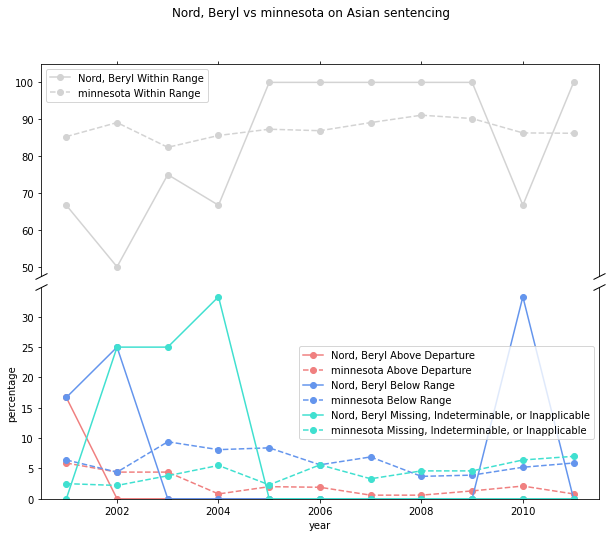

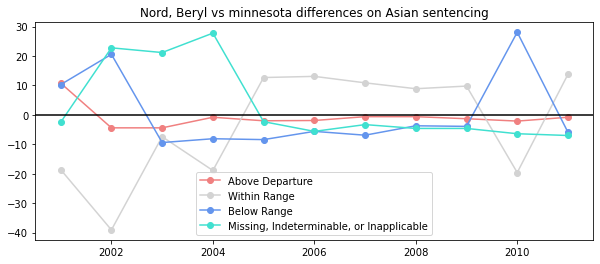

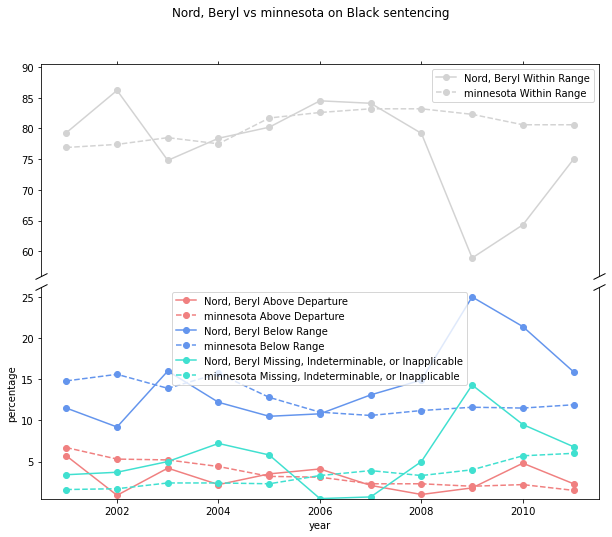

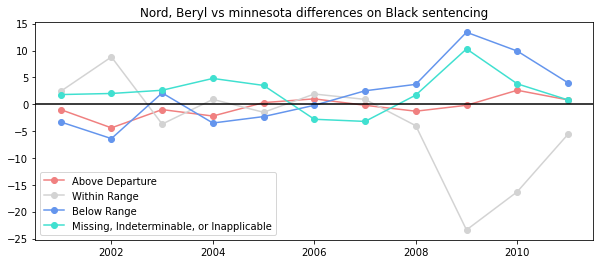

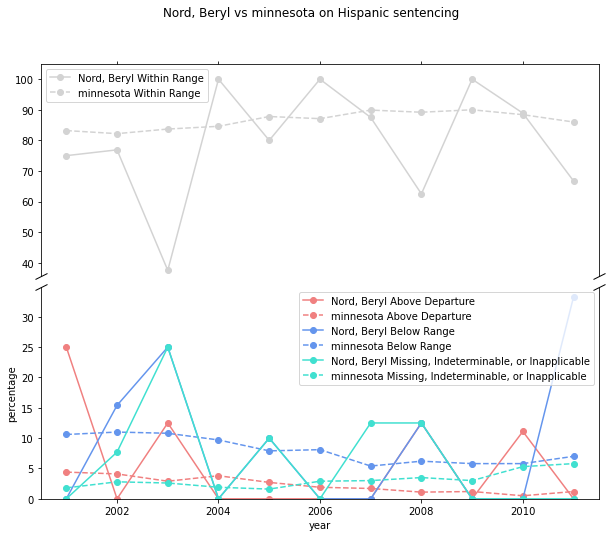

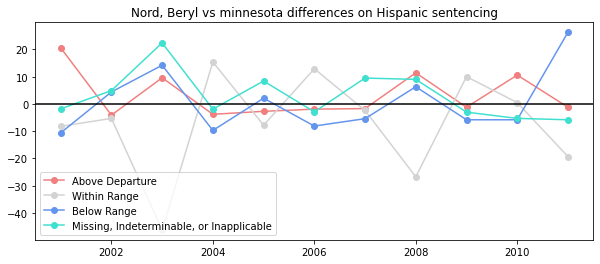

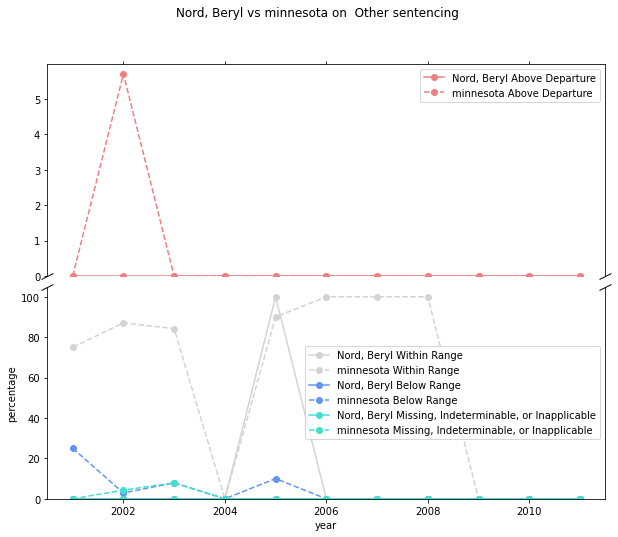

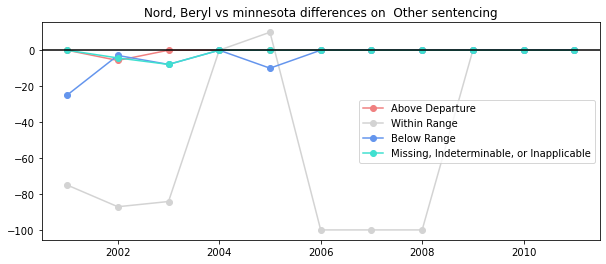

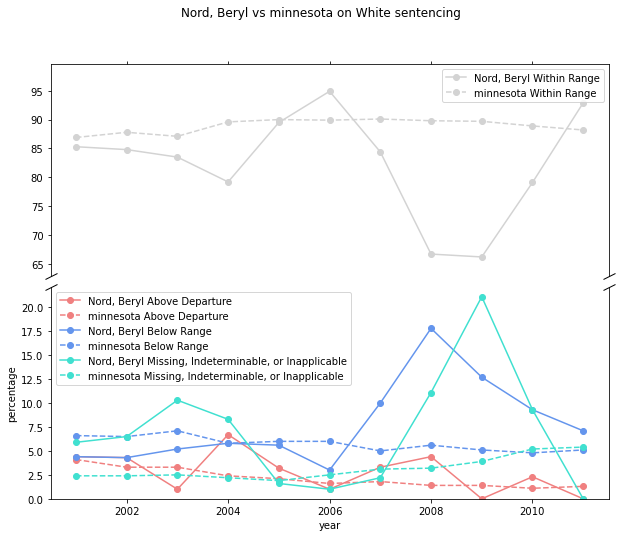

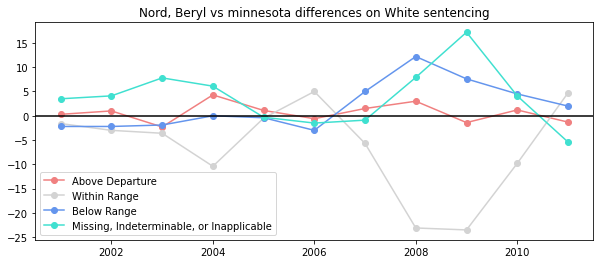

In [22]:
output = minnesota.individual_section_analysis_v2('judge','Nord, Beryl', ['race','departure'], plot = False)

In [18]:
output[2001][0]  # this prints the judge data for 2001. output[2001][1] would print the rest of the state's data for 2001.

count  percent
race            durdep                                                  
American Indian Within Range                                  7     87.5
                Below Range                                   1     12.5
Asian           Within Range                                  4     66.7
                Above Departure                               1     16.7
                Below Range                                   1     16.7
Black           Within Range                                 69     79.3
                Above Departure                               5      5.7
                Below Range                                  10     11.5
                Missing, Indeterminable, or Inapplicable      3      3.4
Hispanic        Within Range                                  6     75.0
                Above Departure                               2     25.0
White           Within Range                                 58     85.3
                Above Departure                               3      4.4
                Below Range                                   3      4.4
                Missing, Indeterminable, or Inapplicable      4      5.9